# 反轉圖形的底部型態

## 程式實作：以人工方式設定頸線

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import mplfinance as mpf
import numpy as np

In [2]:
##### 使用2022年9月19日到2023年5月30日之日線圖資料 #####

# 載入從「好神通PLUS」輸出的Excel檔
df = pd.read_excel('Day7_Day13.xlsx')

# 保存K棒的基本資訊(開、高、低、收、量)
df_k_line = df.drop(columns=['SMA5','SMA10','SMA20','SMA60','SMA120','SMA240','MA5','MA10'])

# 保存價的移動平均線
df_sma = df.drop(columns=['開盤價','最高價','最低價','收盤價','成交量','MA5','MA10']) 

# 將K棒的Columns的名稱由中文改為英文
df_k_line = df_k_line.rename(columns={'時間':'Date','開盤價':'Open','最高價':'High','最低價':'Low','收盤價':'Close','成交量':'Volume'})

# 將價的移動平均線的Columns的名稱由中文改為英文
df_sma = df_sma.rename(columns={'時間':'Date'})

# 將K棒的Date設為Index
df_k_line.set_index(df_k_line['Date'],inplace=True)
df_k_line = df_k_line.drop(columns=['Date'])

# 將價的移動平均線的Date設為Index
df_sma.set_index(df_sma['Date'],inplace=True)
df_sma = df_sma.drop(columns=['Date'])

In [3]:
# 人工方式設定頸線：5月29日收盤價
neckline_price = df_k_line.loc['2023-05-29']['Close']
neckline_start_date = '2022-09-22'
neckline_end_date = '2023-05-30'

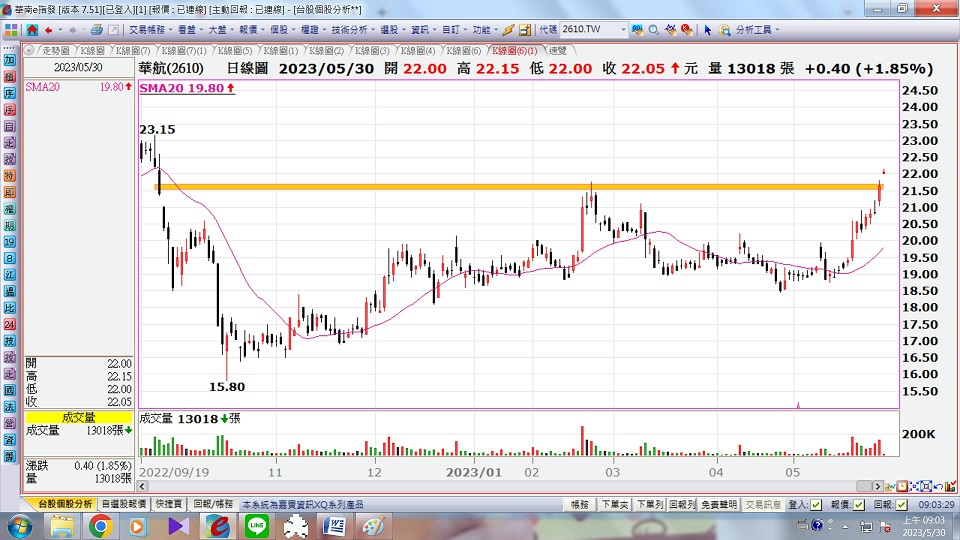

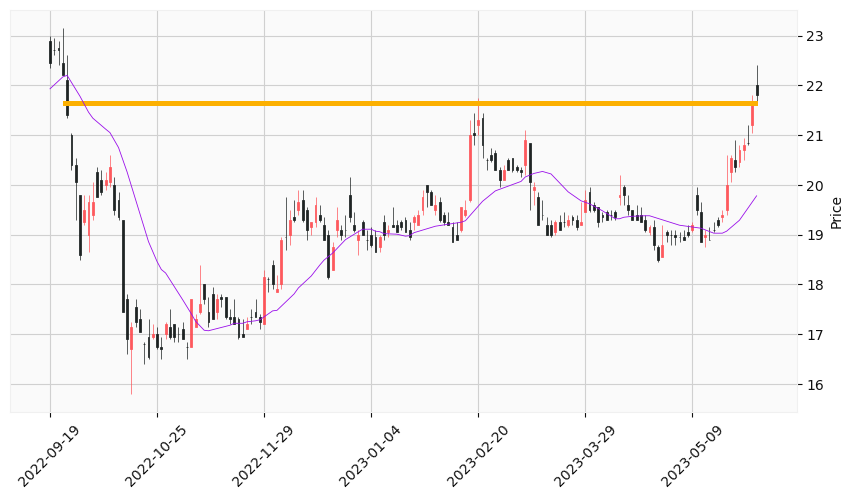

In [4]:
# 設定K線格式
mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

# 設定上升趨勢線
seq_of_seq_of_points=[
    [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
                     ]

# 設定移動平均線
added_plots={
    "SMA20": mpf.make_addplot(df_sma['SMA20'],width=0.6,color='xkcd:violet')
            }

# 繪出K線圖
kwargs = dict(type='candle', style=s, figratio=(19,10), addplot=list(added_plots.values()),alines=dict(alines=seq_of_seq_of_points, linewidths=2.5, colors=('xkcd:yellow orange')), datetime_format='%Y-%m-%d')
mpf.plot(df_k_line,**kwargs) 

## 程式實作：從轉折點識別頭肩底

FindingHeadShouldersBottom()函式參考資訊：
* [Algorithmically Detecting (and Trading) Technical Chart Patterns with Python](https://medium.com/automation-generation/algorithmically-detecting-and-trading-technical-chart-patterns-with-python-c577b3a396ed)  
* [pythonで逆三尊を検出、plotlyで図示](https://www.trade-ganbaru.com/trade_monitor/python%e3%81%a7%e9%80%86%e4%b8%89%e5%b0%8a%e3%82%92%e6%a4%9c%e5%87%ba%e3%80%81plotly%e3%81%a7%e5%9b%b3%e7%a4%ba/)
* [Price Action Trading Strategies Using Python - Section 6, Unit 7 : Detecting Head and Shoulders](https://quantra.quantinsti.com/startCourseDetails?cid=266&section_no=6&unit_no=7&preview=true&course_type=paid&unit_type=Notebook)  

In [5]:
##### 尋找「頭肩底」型態函式 #####
def FindingHeadShouldersBottom(turning_points):    
    # To store pattern instances
    patterns = []
    
    # Loop to iterate along the price data
    for i in range(5, len(turning_points)):
        
        # Store 5 local minima and local maxima points at a time in the variable 'window'
        window = turning_points.iloc[i-5:i]
        
        # Ensure that pattern is formed within 120 bars
        if window.index[-1] - window.index[0] > 100:
            continue   
        
        # Store the 5 unique points to check for conditions
        a, b, c, d, e = window.iloc[0:5]['Price']
        a_type, b_type, c_type, d_type, e_type = window.iloc[0:5]['Type']
        
        # cond_1: To check a,c,e type are 'LO'
        cond_1 = (a_type == 'LO') and (c_type == 'LO') and (e_type == 'LO')
        
        # cond_2: To check b,d type are 'HI'
        cond_2 = (b_type == 'HI') and (d_type == 'HI')

        # cond_3: To check if the shoulders are above the neckline and the head is above the shoulders
        cond_3 = (a < b) and (c < a) and  (c < e) and  (c < d) and (e < d)

        # cond_4: To check if B and D are at a distance less than 5% away from their mean
        cond_4 = abs(b-d)<=np.mean([b,d])*0.05
            
        # Checking if all conditions are true
        if cond_1 and cond_2 and cond_3 and cond_4:
            patterns.append(window)
    
    return patterns

In [6]:
##### 使用2022年2月25日到2023年4月7日之日線圖資料 #####

# 載入從「好神通PLUS」輸出的Excel檔
df = pd.read_excel('Day13_Day14_Day23.xlsx')

# 保存K棒的基本資訊(開、高、低、收、量)
df_k_line = df.drop(columns=['SMA5','SMA10','SMA20','SMA60','SMA120','SMA240','MA5','MA10'])

# 保存價的移動平均線
df_sma = df.drop(columns=['開盤價','最高價','最低價','收盤價','成交量','MA5','MA10']) 

# 將K棒的Columns的名稱由中文改為英文
df_k_line = df_k_line.rename(columns={'時間':'Date','開盤價':'Open','最高價':'High','最低價':'Low','收盤價':'Close','成交量':'Volume'})

# 將價的移動平均線的Columns的名稱由中文改為英文
df_sma = df_sma.rename(columns={'時間':'Date'})

# 將K棒的Date設為Index
df_k_line.set_index(df_k_line['Date'],inplace=True)
df_k_line = df_k_line.drop(columns=['Date'])

# 將價的移動平均線的Date設為Index
df_sma.set_index(df_sma['Date'],inplace=True)
df_sma = df_sma.drop(columns=['Date'])

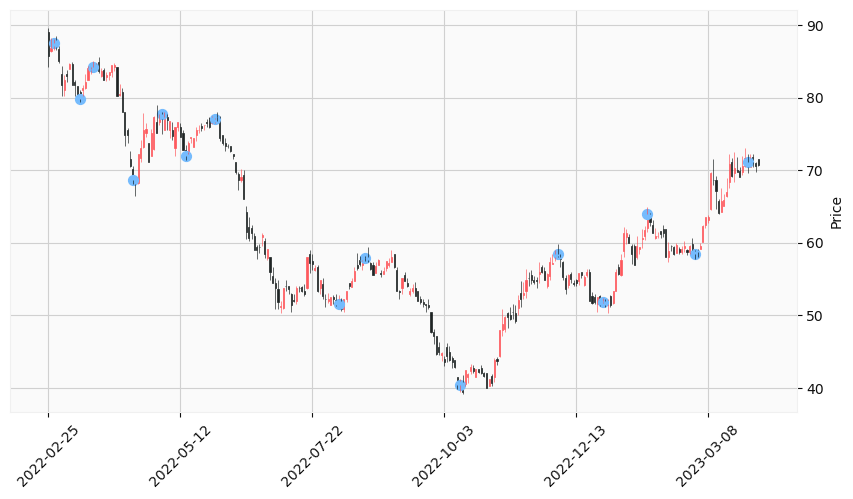

In [7]:
import myutils

# 尋找轉折點
_,_,max_min = myutils.FindingTurningPoints(df_k_line,'close',order=10,smoothing=3,real_body=True)

# 設定K線格式
mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

# 設定移動平均線與轉折點    
turning_points_len = len(np.array(df_k_line['Close']))
turning_points = np.array([np.nan]*turning_points_len)
for point in max_min.iterrows() :
    turning_points[point[0]] = point[1]['Price']    
apds = [
    mpf.make_addplot(turning_points,type='scatter',marker='o',markersize=50,color='xkcd:sky blue')
]

# 繪出K線圖
kwargs = dict(type='candle', style=s, figratio=(19,10), addplot=apds, datetime_format='%Y-%m-%d')
mpf.plot(df_k_line,**kwargs)

找到一個型態：
                Date  Price Type
DateIndex                       
110       2022-08-05   51.6   LO
120       2022-08-19   57.9   HI
156       2022-10-12   40.4   LO
193       2022-12-02   58.4   HI
210       2022-12-27   51.9   LO


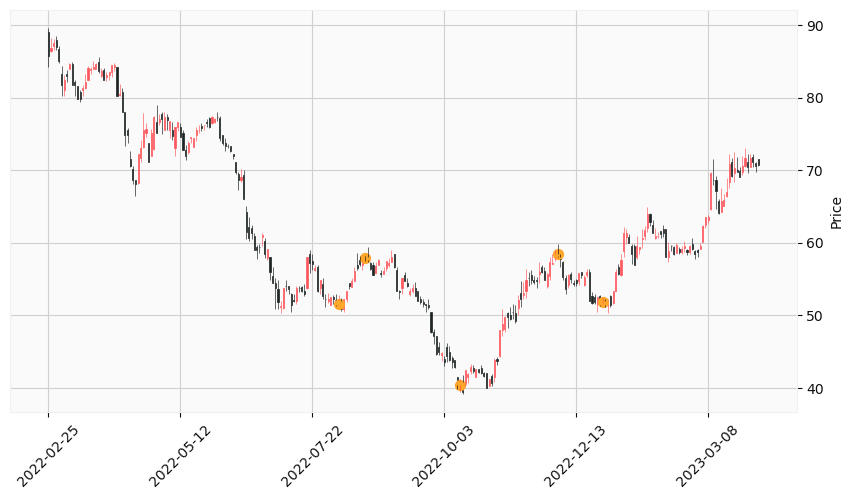

In [8]:
patterns_points_len = len(np.array(df_k_line['Close']))
patterns_points = np.array([np.nan]*patterns_points_len)
# 尋找「頭肩底」型態
patterns = FindingHeadShouldersBottom(max_min)
if len(patterns) > 0 :
    for pattern in patterns :
        print('找到一個型態：')
        print(pattern)
        for point in pattern.iterrows():
            # 標記型態的5個連續點
            patterns_points[point[0]] = point[1]['Price']
        apds = [
            mpf.make_addplot(patterns_points,type='scatter',marker='o',markersize=50,color='xkcd:mango')
        ]
        # 繪出K線圖
        kwargs = dict(type='candle', style=s, figratio=(19,10), addplot=apds, datetime_format='%Y-%m-%d')
        mpf.plot(df_k_line,**kwargs)
else :
    print('沒有找到型態')

In [9]:
def date_to_index(df_in,date_in) :
    number_array = df_in.index == date_in
    idx = 0
    for number_index in number_array :
        if number_index == True :
            break
        idx = idx + 1
    return idx

In [10]:
# 人工方式設定頸線
neckline_x = [120,193]
neckline_y = [max_min.loc[neckline_x[0]]['Price'],max_min.loc[neckline_x[1]]['Price']]
slope,intercept = np.polyfit(neckline_x,neckline_y,1)
neckline_start_date = '2022-07-20'
neckline__start_price = slope * date_to_index(df_k_line,neckline_start_date) + intercept
neckline_end_date = '2023-01-09'
neckline_end_price = slope * date_to_index(df_k_line,neckline_end_date) + intercept

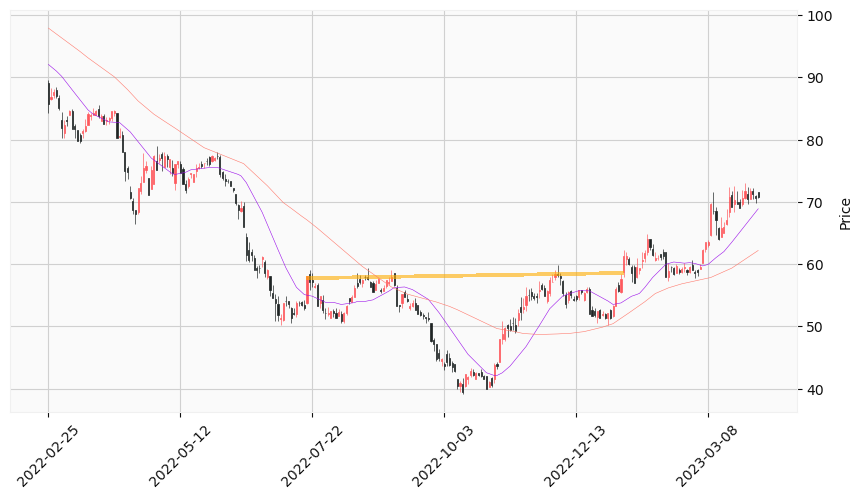

In [11]:
# 設定K線格式
mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

# 設定頸線
seq_of_seq_of_points=[
    [(neckline_start_date,neckline__start_price),(neckline_end_date,neckline_end_price)]
                     ]

# 設定移動平均線
added_plots={
    "SMA20": mpf.make_addplot(df_sma['SMA20'],width=0.4,color='xkcd:violet'),
    "SMA60": mpf.make_addplot(df_sma['SMA60'],width=0.4,color='xkcd:salmon')
            }

# 繪出K線圖
kwargs = dict(type='candle', style=s, figratio=(19,10), addplot=list(added_plots.values()), alines=dict(alines=seq_of_seq_of_points, linewidths=2, colors='xkcd:orange yellow', alpha=0.6),datetime_format='%Y-%m-%d')
mpf.plot(df_k_line,**kwargs)